In [2]:
import sys

sys.path.append("/Users/mayanksingh/CursorProjects/llm-learning/scripts/stanford-cs-336")

from activation_fns import *
import numpy as np

In [7]:
batch, d_in, d_out = 4, 128, 128 # batch size, input feature dimension, output feature dimension

x = np.random.randn(batch, d_in)

print("Input: \n", x[:5, :5])
print("Input shape: ", x.shape)
print("-" * 50)

y_relu = relu(x)
print("ReLU: \n", y_relu[:5, :5])
print("ReLU shape: ", y_relu.shape)
print("-" * 50)

y_tanh = tanh(x)
print("Tanh: \n", y_tanh[:5, :5])
print("Tanh shape: ", y_tanh.shape)
print("-" * 50)

y_softmax = softmax(x)
print("Softmax: \n", y_softmax[:5, :5])
print("Softmax shape: ", y_softmax.shape)
print("-" * 50)

y_swish = swish(x)
print("Swish: \n", y_swish[:5, :5])
print("Swish shape: ", y_swish.shape)
print("-" * 50)

glu_layer = GLU(d_in, d_out)
y_glu = glu_layer(x)
print("GLU: \n", y_glu[:5, :5])
print("GLU shape: ", y_glu.shape)
print("-" * 50)

swiglu_layer = SwiGLU(d_in, d_out)
y_swiglu = swiglu_layer(x)
print("SwiGLU: \n", y_swiglu[:5, :5])
print("SwiGLU shape: ", y_swiglu.shape)
print("-" * 50)

Input: 
 [[-0.23415337 -0.23413696  1.57921282  0.76743473 -0.46947439]
 [-1.06230371  0.47359243 -0.91942423  1.54993441 -0.78325329]
 [-0.92693047 -0.05952536 -3.24126734 -1.02438764 -0.25256815]
 [ 0.95042384 -0.57690366 -0.89841467  0.49191917 -1.32023321]]
Input shape:  (4, 128)
--------------------------------------------------
ReLU: 
 [[0.         0.         1.57921282 0.76743473 0.        ]
 [0.         0.47359243 0.         1.54993441 0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.95042384 0.         0.         0.49191917 0.        ]]
ReLU shape:  (4, 128)
--------------------------------------------------
Tanh: 
 [[-0.22996582 -0.22995027  0.91847887  0.64543531 -0.43777453]
 [-0.78654397  0.44109736 -0.72562492  0.91377467 -0.65457005]
 [-0.72915957 -0.05945515 -0.99694482 -0.77164762 -0.24733124]
 [ 0.73997487 -0.5204113  -0.71552507  0.45573833 -0.86684191]]
Tanh shape:  (4, 128)
--------------------------------------------------
Softmax: 
 [[0.1

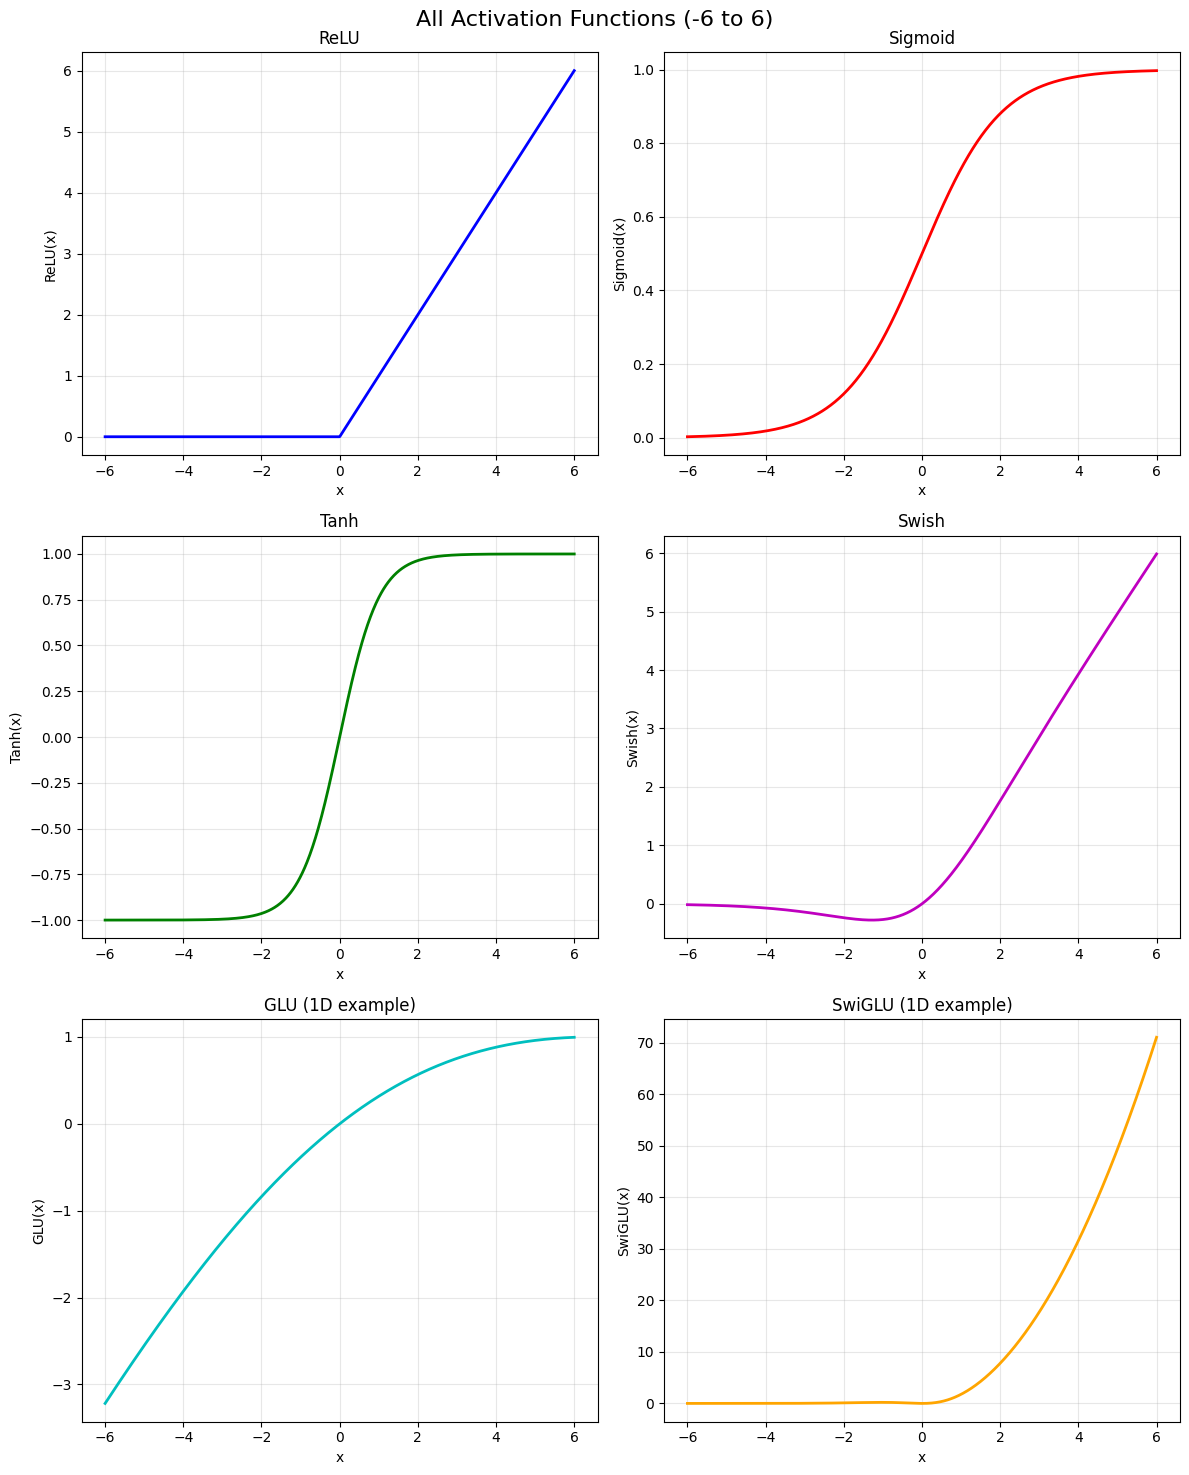

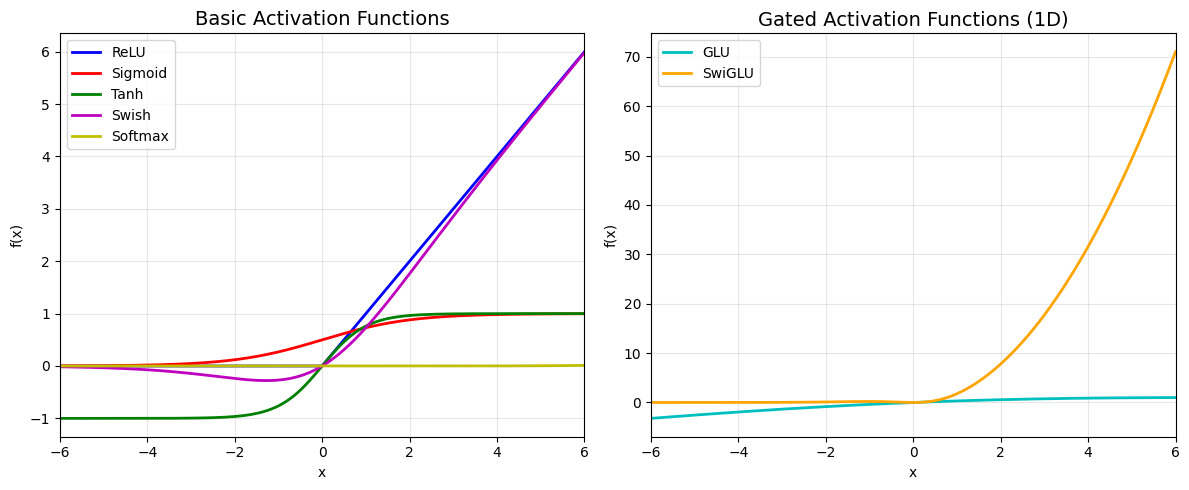

Activation Function Characteristics:
BASIC ACTIVATION FUNCTIONS:
------------------------------
ReLU: f(x) = max(0, x)
- Range: [0, ∞)
- Non-saturating for positive inputs
- Zero gradient for negative inputs

Sigmoid: f(x) = 1/(1 + e^(-x))
- Range: (0, 1)
- Saturates at both ends
- S-shaped curve

Tanh: f(x) = tanh(x)
- Range: (-1, 1)
- Zero-centered
- S-shaped curve

Swish: f(x) = x * sigmoid(x)
- Range: (-∞, ∞)
- Smooth, non-monotonic
- Self-gated activation

GATED ACTIVATION FUNCTIONS:
------------------------------
GLU: f(x) = (x * W_v + b_v) ⊙ sigmoid(x * W_g + b_g)
- Gated Linear Unit with sigmoid gating
- Learnable parameters: W_v, W_g, b_v, b_g
- Controls information flow via gating mechanism
- Used in transformer architectures

SwiGLU: f(x) = (x * W_v + b_v) ⊙ swish(x * W_g + b_g)
- Swish-Gated Linear Unit with swish gating
- Similar to GLU but uses swish instead of sigmoid
- Often performs better than GLU in practice
- Popular in modern language models

Note: GLU and SwiGLU p

In [ ]:
# plot charts for activation functions

import sys

sys.path.append("/Users/mayanksingh/CursorProjects/llm-learning/scripts/stanford-cs-336")

from activation_fns import *
import numpy as np

# plot charts for activation functions

import matplotlib.pyplot as plt


# Create plots for all activation functions from -6 to 6
x_range = np.linspace(-6, 6, 1000)

# Create GLU and SwiGLU instances for 1D input/output
np.random.seed(42)  # For reproducible results
glu_1d = GLU(1, 1)
swiglu_1d = SwiGLU(1, 1)

# Evaluate GLU and SwiGLU on the range (reshape for matrix operations)
x_range_reshaped = x_range.reshape(-1, 1)
glu_values = np.array([glu_1d(x.reshape(1, -1))[0, 0] for x in x_range_reshaped])
swiglu_values = np.array([swiglu_1d(x.reshape(1, -1))[0, 0] for x in x_range_reshaped])

# Create a figure with subplots (3x2 grid to include GLU and SwiGLU)
fig, axes = plt.subplots(3, 2, figsize=(12, 15))
fig.suptitle('All Activation Functions (-6 to 6)', fontsize=16)

# Plot ReLU
axes[0, 0].plot(x_range, relu(x_range), 'b-', linewidth=2, label='ReLU')
axes[0, 0].set_title('ReLU')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xlabel('x')
axes[0, 0].set_ylabel('ReLU(x)')

# Plot Sigmoid
axes[0, 1].plot(x_range, sigmoid(x_range), 'r-', linewidth=2, label='Sigmoid')
axes[0, 1].set_title('Sigmoid')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xlabel('x')
axes[0, 1].set_ylabel('Sigmoid(x)')

# Plot Tanh
axes[1, 0].plot(x_range, tanh(x_range), 'g-', linewidth=2, label='Tanh')
axes[1, 0].set_title('Tanh')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('Tanh(x)')

# Plot Swish
axes[1, 1].plot(x_range, swish(x_range), 'm-', linewidth=2, label='Swish')
axes[1, 1].set_title('Swish')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xlabel('x')
axes[1, 1].set_ylabel('Swish(x)')

# Plot GLU
axes[2, 0].plot(x_range, glu_values, 'c-', linewidth=2, label='GLU')
axes[2, 0].set_title('GLU (1D example)')
axes[2, 0].grid(True, alpha=0.3)
axes[2, 0].set_xlabel('x')
axes[2, 0].set_ylabel('GLU(x)')

# Plot SwiGLU
axes[2, 1].plot(x_range, swiglu_values, 'orange', linewidth=2, label='SwiGLU')
axes[2, 1].set_title('SwiGLU (1D example)')
axes[2, 1].grid(True, alpha=0.3)
axes[2, 1].set_xlabel('x')
axes[2, 1].set_ylabel('SwiGLU(x)')

plt.tight_layout()
plt.show()

# Create comparison plots
# First comparison: Basic activation functions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(x_range, relu(x_range), 'b-', linewidth=2, label='ReLU')
plt.plot(x_range, sigmoid(x_range), 'r-', linewidth=2, label='Sigmoid')
plt.plot(x_range, tanh(x_range), 'g-', linewidth=2, label='Tanh')
plt.plot(x_range, swish(x_range), 'm-', linewidth=2, label='Swish')
plt.plot(x_range, softmax(x_range), 'y-', linewidth=2, label='Softmax')
plt.title('Basic Activation Functions', fontsize=14)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(-6, 6)

# Second comparison: Gated activation functions
plt.subplot(1, 2, 2)
plt.plot(x_range, glu_values, 'c-', linewidth=2, label='GLU')
plt.plot(x_range, swiglu_values, 'orange', linewidth=2, label='SwiGLU')
plt.title('Gated Activation Functions (1D)', fontsize=14)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(-6, 6)

plt.tight_layout()
plt.show()

# Print some key characteristics
print("Activation Function Characteristics:")
print("=" * 70)
print("BASIC ACTIVATION FUNCTIONS:")
print("-" * 30)
print("ReLU: f(x) = max(0, x)")
print("- Range: [0, ∞)")
print("- Non-saturating for positive inputs")
print("- Zero gradient for negative inputs")
print()
print("Sigmoid: f(x) = 1/(1 + e^(-x))")
print("- Range: (0, 1)")
print("- Saturates at both ends")
print("- S-shaped curve")
print()
print("Tanh: f(x) = tanh(x)")
print("- Range: (-1, 1)")
print("- Zero-centered")
print("- S-shaped curve")
print()
print("Swish: f(x) = x * sigmoid(x)")
print("- Range: (-∞, ∞)")
print("- Smooth, non-monotonic")
print("- Self-gated activation")
print()
print("GATED ACTIVATION FUNCTIONS:")
print("-" * 30)
print("GLU: f(x) = (x * W_v + b_v) ⊙ sigmoid(x * W_g + b_g)")
print("- Gated Linear Unit with sigmoid gating")
print("- Learnable parameters: W_v, W_g, b_v, b_g")
print("- Controls information flow via gating mechanism")
print("- Used in transformer architectures")
print()
print("SwiGLU: f(x) = (x * W_v + b_v) ⊙ swish(x * W_g + b_g)")
print("- Swish-Gated Linear Unit with swish gating")
print("- Similar to GLU but uses swish instead of sigmoid")
print("- Often performs better than GLU in practice")
print("- Popular in modern language models")
print()
print("Note: GLU and SwiGLU plots show 1D examples with random weights.")
print("In practice, they operate on high-dimensional vectors.")


GLU and SwiGLU Behavior with Different Random Initializations


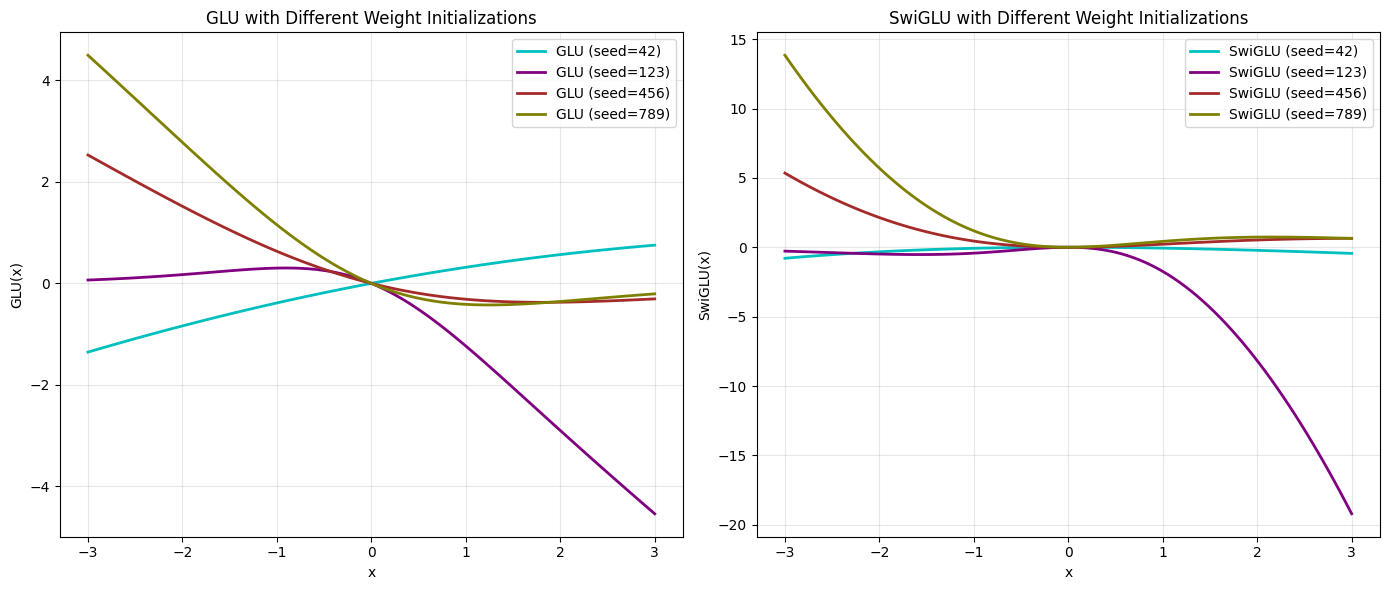


Key observations:
- GLU and SwiGLU outputs depend on learned parameters (weights and biases)
- Different initializations lead to different activation patterns
- Both can learn to amplify or suppress signals based on gating
- The gating mechanism allows for more complex, data-dependent behavior


In [12]:
# Demonstrate GLU and SwiGLU with different random initializations
print("GLU and SwiGLU Behavior with Different Random Initializations")
print("=" * 60)

x_demo = np.linspace(-3, 3, 100)
x_demo_reshaped = x_demo.reshape(-1, 1)

plt.figure(figsize=(14, 6))

# GLU with different seeds
plt.subplot(1, 2, 1)
seeds = [42, 123, 456, 789]
colors = ['c', 'purple', 'brown', 'olive']

for i, (seed, color) in enumerate(zip(seeds, colors)):
    np.random.seed(seed)
    glu = GLU(1, 1)
    glu_vals = np.array([glu(x.reshape(1, -1))[0, 0] for x in x_demo_reshaped])
    plt.plot(x_demo, glu_vals, color=color, linewidth=2, label=f'GLU (seed={seed})')

plt.title('GLU with Different Weight Initializations')
plt.xlabel('x')
plt.ylabel('GLU(x)')
plt.legend()
plt.grid(True, alpha=0.3)

# SwiGLU with different seeds
plt.subplot(1, 2, 2)
for i, (seed, color) in enumerate(zip(seeds, colors)):
    np.random.seed(seed)
    swiglu = SwiGLU(1, 1)
    swiglu_vals = np.array([swiglu(x.reshape(1, -1))[0, 0] for x in x_demo_reshaped])
    plt.plot(x_demo, swiglu_vals, color=color, linewidth=2, label=f'SwiGLU (seed={seed})')

plt.title('SwiGLU with Different Weight Initializations')
plt.xlabel('x')
plt.ylabel('SwiGLU(x)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nKey observations:")
print("- GLU and SwiGLU outputs depend on learned parameters (weights and biases)")
print("- Different initializations lead to different activation patterns")
print("- Both can learn to amplify or suppress signals based on gating")
print("- The gating mechanism allows for more complex, data-dependent behavior")


In [10]:
# Why are GLU and SwiGLU "blowing up"? Let's investigate!
print("Understanding GLU and SwiGLU Behavior")
print("=" * 50)

x_test = np.array([-2, -1, 0, 1, 2]).reshape(-1, 1)

# Create a GLU instance and examine its weights
np.random.seed(42)
glu_test = GLU(1, 1)

print("GLU Components:")
print(f"W_v (value weight): {glu_test.W_v[0,0]:.4f}")
print(f"W_g (gate weight):  {glu_test.W_g[0,0]:.4f}")
print(f"b_v (value bias):   {glu_test.b_v[0]:.4f}")
print(f"b_g (gate bias):    {glu_test.b_g[0]:.4f}")
print()

print("Step-by-step breakdown for x = 2:")
x_val = 2.0
value_component = x_val * glu_test.W_v[0,0] + glu_test.b_v[0]
gate_input = x_val * glu_test.W_g[0,0] + glu_test.b_g[0]
gate_output = sigmoid(gate_input)
final_output = value_component * gate_output

print(f"1. Value component: x * W_v + b_v = {x_val} * {glu_test.W_v[0,0]:.4f} + {glu_test.b_v[0]:.4f} = {value_component:.4f}")
print(f"2. Gate input: x * W_g + b_g = {x_val} * {glu_test.W_g[0,0]:.4f} + {glu_test.b_g[0]:.4f} = {gate_input:.4f}")
print(f"3. Gate output: sigmoid({gate_input:.4f}) = {gate_output:.4f}")
print(f"4. Final: {value_component:.4f} * {gate_output:.4f} = {final_output:.4f}")
print()

# Compare with smaller weights
print("Let's try with smaller weights:")
glu_small = GLU(1, 1)
# Manually set smaller weights
glu_small.W_v = np.array([[0.5]])
glu_small.W_g = np.array([[0.3]])

value_small = x_val * glu_small.W_v[0,0] + glu_small.b_v[0]
gate_small = sigmoid(x_val * glu_small.W_g[0,0] + glu_small.b_g[0])
final_small = value_small * gate_small

print(f"Small weights - Value component: {value_small:.4f}")
print(f"Small weights - Gate output: {gate_small:.4f}")
print(f"Small weights - Final output: {final_small:.4f}")
print()

print("Key insights:")
print("- GLU/SwiGLU are NOT just activation functions - they're learnable transformations")
print("- The 'value' component (x * W_v + b_v) can amplify inputs significantly")
print("- Large random weights → large outputs (this is normal!)")
print("- In practice, these weights would be learned during training to appropriate values")
print("- The initialization uses Xavier/Glorot scaling, which can produce large initial weights")


Understanding GLU and SwiGLU Behavior
GLU Components:
W_v (value weight): 0.7025
W_g (gate weight):  -0.1955
b_v (value bias):   0.0000
b_g (gate bias):    0.0000

Step-by-step breakdown for x = 2:
1. Value component: x * W_v + b_v = 2.0 * 0.7025 + 0.0000 = 1.4049
2. Gate input: x * W_g + b_g = 2.0 * -0.1955 + 0.0000 = -0.3911
3. Gate output: sigmoid(-0.3911) = 0.4035
4. Final: 1.4049 * 0.4035 = 0.5668

Let's try with smaller weights:
Small weights - Value component: 1.0000
Small weights - Gate output: 0.6457
Small weights - Final output: 0.6457

Key insights:
- GLU/SwiGLU are NOT just activation functions - they're learnable transformations
- The 'value' component (x * W_v + b_v) can amplify inputs significantly
- Large random weights → large outputs (this is normal!)
- In practice, these weights would be learned during training to appropriate values
- The initialization uses Xavier/Glorot scaling, which can produce large initial weights


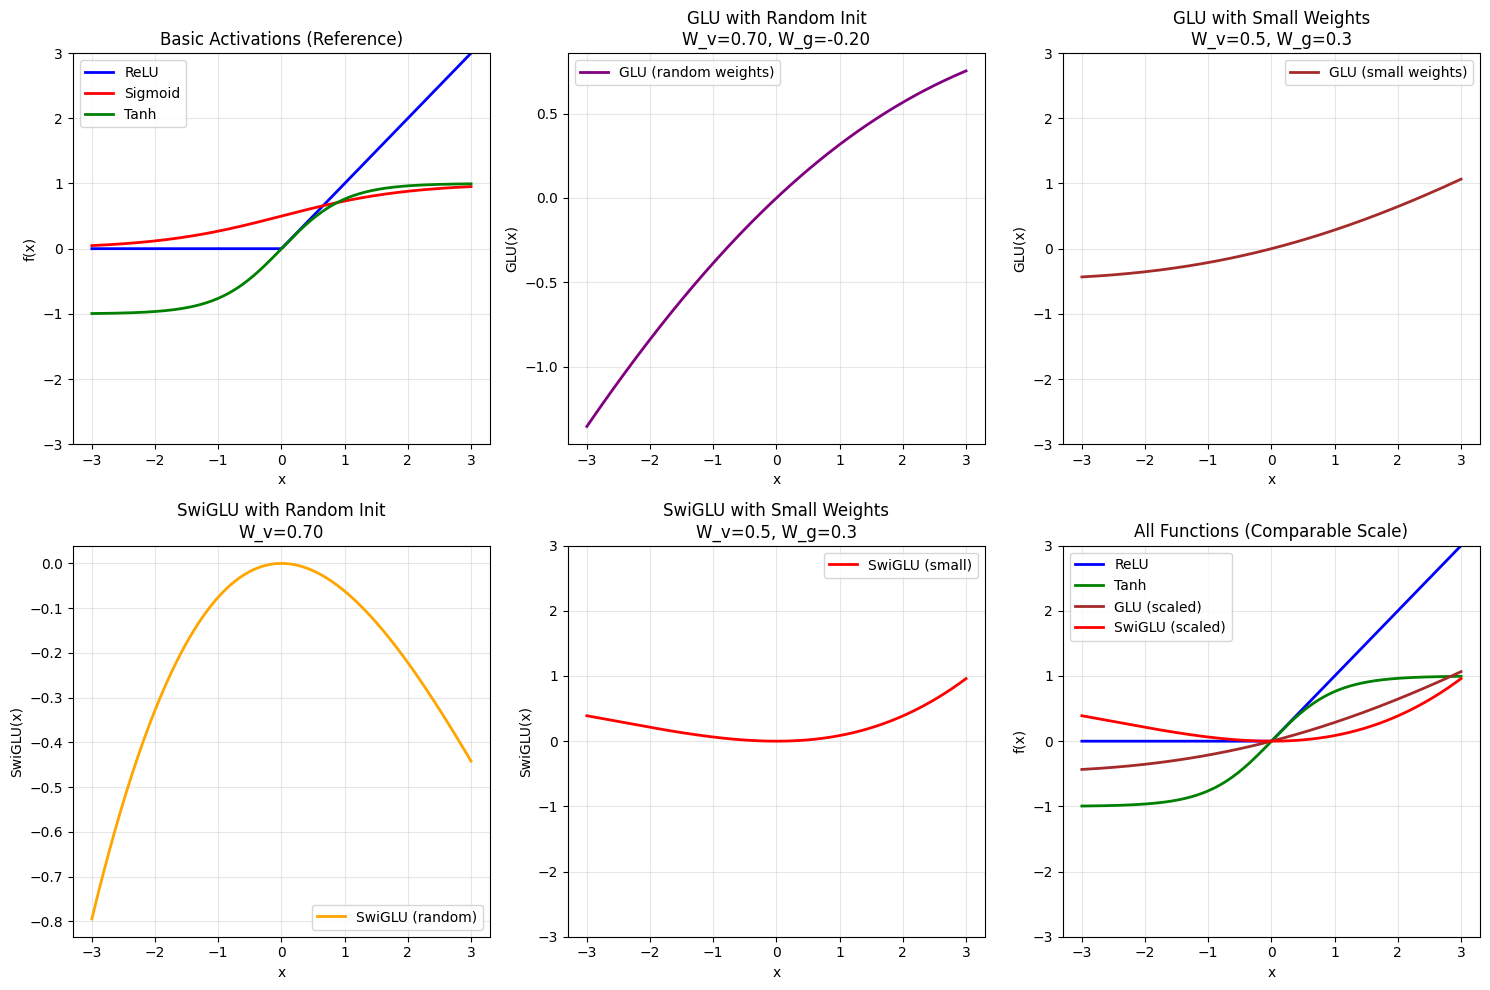


Summary:
- GLU/SwiGLU with random initialization can produce very large outputs
- This happens because: output = (x * W_v + b_v) * gate_function(x * W_g + b_g)
- The linear transformation x * W_v can amplify the input significantly
- With smaller, controlled weights, they behave more like traditional activations
- In real neural networks, these weights are learned through backpropagation
- The 'large' outputs aren't wrong - they're just untuned initial values!


In [11]:
# Visual comparison: GLU with different weight scales
x_range_small = np.linspace(-3, 3, 200)
x_range_reshaped_small = x_range_small.reshape(-1, 1)

plt.figure(figsize=(15, 10))

# Plot 1: Basic activations (for reference)
plt.subplot(2, 3, 1)
plt.plot(x_range_small, relu(x_range_small), 'b-', linewidth=2, label='ReLU')
plt.plot(x_range_small, sigmoid(x_range_small), 'r-', linewidth=2, label='Sigmoid')
plt.plot(x_range_small, tanh(x_range_small), 'g-', linewidth=2, label='Tanh')
plt.title('Basic Activations (Reference)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(-3, 3)

# Plot 2: GLU with original random weights
plt.subplot(2, 3, 2)
np.random.seed(42)
glu_original = GLU(1, 1)
glu_vals_orig = np.array([glu_original(x.reshape(1, -1))[0, 0] for x in x_range_reshaped_small])
plt.plot(x_range_small, glu_vals_orig, 'purple', linewidth=2, label='GLU (random weights)')
plt.title(f'GLU with Random Init\nW_v={glu_original.W_v[0,0]:.2f}, W_g={glu_original.W_g[0,0]:.2f}')
plt.xlabel('x')
plt.ylabel('GLU(x)')
plt.grid(True, alpha=0.3)
plt.legend()

# Plot 3: GLU with smaller weights
plt.subplot(2, 3, 3)
glu_small = GLU(1, 1)
glu_small.W_v = np.array([[0.5]])
glu_small.W_g = np.array([[0.3]])
glu_vals_small = np.array([glu_small(x.reshape(1, -1))[0, 0] for x in x_range_reshaped_small])
plt.plot(x_range_small, glu_vals_small, 'brown', linewidth=2, label='GLU (small weights)')
plt.title('GLU with Small Weights\nW_v=0.5, W_g=0.3')
plt.xlabel('x')
plt.ylabel('GLU(x)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.ylim(-3, 3)

# Plot 4: SwiGLU with original weights
plt.subplot(2, 3, 4)
np.random.seed(42)
swiglu_original = SwiGLU(1, 1)
swiglu_vals_orig = np.array([swiglu_original(x.reshape(1, -1))[0, 0] for x in x_range_reshaped_small])
plt.plot(x_range_small, swiglu_vals_orig, 'orange', linewidth=2, label='SwiGLU (random)')
plt.title(f'SwiGLU with Random Init\nW_v={swiglu_original.W_v[0,0]:.2f}')
plt.xlabel('x')
plt.ylabel('SwiGLU(x)')
plt.grid(True, alpha=0.3)
plt.legend()

# Plot 5: SwiGLU with smaller weights
plt.subplot(2, 3, 5)
swiglu_small = SwiGLU(1, 1)
swiglu_small.W_v = np.array([[0.5]])
swiglu_small.W_g = np.array([[0.3]])
swiglu_vals_small = np.array([swiglu_small(x.reshape(1, -1))[0, 0] for x in x_range_reshaped_small])
plt.plot(x_range_small, swiglu_vals_small, 'red', linewidth=2, label='SwiGLU (small)')
plt.title('SwiGLU with Small Weights\nW_v=0.5, W_g=0.3')
plt.xlabel('x')
plt.ylabel('SwiGLU(x)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.ylim(-3, 3)

# Plot 6: All small-weight versions together
plt.subplot(2, 3, 6)
plt.plot(x_range_small, relu(x_range_small), 'b-', linewidth=2, label='ReLU')
plt.plot(x_range_small, tanh(x_range_small), 'g-', linewidth=2, label='Tanh')
plt.plot(x_range_small, glu_vals_small, 'brown', linewidth=2, label='GLU (scaled)')
plt.plot(x_range_small, swiglu_vals_small, 'red', linewidth=2, label='SwiGLU (scaled)')
plt.title('All Functions (Comparable Scale)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(-3, 3)

plt.tight_layout()
plt.show()

print("\nSummary:")
print("- GLU/SwiGLU with random initialization can produce very large outputs")
print("- This happens because: output = (x * W_v + b_v) * gate_function(x * W_g + b_g)")
print("- The linear transformation x * W_v can amplify the input significantly") 
print("- With smaller, controlled weights, they behave more like traditional activations")
print("- In real neural networks, these weights are learned through backpropagation")
print("- The 'large' outputs aren't wrong - they're just untuned initial values!")
